
## Notas sobre funciones de profundidad estadística
A continuación, se presentan notas detalladas y rigurosas en markdown sobre las funciones de profundidad estadística, basadas en el artículo *"General Notions of Statistical Depth Function"* de Yijun Zuo y Robert Serfling. Se abordan las cualidades deseadas, los tipos de funciones de profundidad y una explicación específica de las profundidades de Mahalanobis, Half Space de Tukey y espacial.

### 1. Cualidades que debe tener una función de profundidad
Una función de profundidad estadística, $D(\cdot; P)$, definida para una distribución $P$ en $\mathbb{R}^d$, debe proporcionar un ordenamiento de los puntos desde el centro hacia afuera. Para ser considerada ideal, debe satisfacer las siguientes cuatro propiedades matemáticamente precisas:

1. **P1. Invarianza Afín**  
   La profundidad de un punto $x \in \mathbb{R}^d$ no debe depender del sistema de coordenadas ni de las escalas de las variables. Formalmente, para cualquier vector aleatorio $X \in \mathbb{R}^d$, cualquier matriz no singular $A \in \mathbb{R}^{d \times d}$ y cualquier vector $b \in \mathbb{R}^d$,  
   $$D(Ax + b; F_{AX + b}) = D(x; F_X),$$  
   donde $F_X$ es la distribución de $X$ y $F_{AX + b}$ la de $AX + b$. Esto asegura que la función sea robusta ante transformaciones afines.

2. **P2. Maximalidad en el Centro**  
   Para una distribución $F$ con un "centro" único $\theta$ (por ejemplo, un punto de simetría según alguna definición), la profundidad debe alcanzar su máximo en $\theta$:  
   $$D(\theta; F) = \sup_{x \in \mathbb{R}^d} D(x; F).$$  
   Esto implica que el punto más profundo coincide con el centro de la distribución, asumiendo que dicho centro está bien definido (e.g., en distribuciones simétricas).

3. **P3. Monotonía Relativa al Punto Más Profundo**  
   La profundidad debe disminuir monotónicamente a medida que un punto $x \in \mathbb{R}^d$ se aleja del punto más profundo $\theta$ a lo largo de cualquier rayo fijo que pase por $\theta$. Matemáticamente, para cualquier $\alpha \in [0, 1]$,  
   $$D(x; F) \leq D(\theta + \alpha(x - \theta); F).$$  
   Esto garantiza que la función refleje un ordenamiento centro-afuera consistente.

4. **P4. Desvanecimiento en el Infinito**  
   La profundidad debe tender a cero cuando la norma del punto $x$ crece sin límite:  
   $$D(x; F) \to 0 \quad \text{a medida que} \quad \|x\| \to \infty, \quad \text{para cada} \quad F \in \mathscr{F},$$  
   donde $\mathscr{F}$ es la clase de distribuciones en $\mathbb{R}^d$. Esto asegura que los puntos extremadamente alejados tengan una profundidad mínima.

Estas propiedades hacen que una función de profundidad sea útil para análisis multivariados no paramétricos, proporcionando robustez y un ordenamiento significativo.

### 2. Tipos de funciones de profundidad
Existen cuatro estructuras generales para construir funciones de profundidad estadística, clasificadas como Tipo A, B, C y D. Cada tipo se define a continuación con su formulación matemática y ejemplos representativos.

- **Tipo A**  
  Se define como el promedio de una medida de cercanía acotada de $x$ a una muestra aleatoria de tamaño $r$:  
  $$D(x; P) = E h(x; X_1, \ldots, X_r),$$  
  donde $X_1, \ldots, X_r \sim P$ y $h(x; x_1, \ldots, x_r)$ es una función no negativa y acotada que mide la cercanía de $x$ a los puntos $x_1, \ldots, x_r$.  

  **Ejemplos**:  
  - Profundidad simplicial ($h = \mathbf{I}\{x \in S[X_1, \ldots, X_{d+1}]\}$).  
  - Profundidad de mayoría.

- **Tipo B**  
  Se basa en una medida de distancia no acotada $h(x; x_1, \ldots, x_r)$, transformada para ser acotada:  
  $$D(x; F) = \left(1 + E h(x; X_1, \ldots, X_r)\right)^{-1},$$  
  donde $X_1, \ldots, X_r \sim F$.  

  **Ejemplos**:  
  - Profundidad de volumen simplicial ($h = \Delta^\alpha(S[x, X_1, \ldots, X_d])$).  
  - Profundidad $L^p$ ($h = \|x - X_1\|_p$).

- **Tipo C**  
  Se construye a partir de una medida de *outlyingness* (atipicidad) $O(x; F)$, también transformada:  
  $$D(x; F) = (1 + O(x; F))^{-1},$$  
  donde $O(x; F)$ mide cuán atípico es $x$ respecto al centro o punto más profundo de $F$.  

  **Ejemplos**:  
  - Profundidad de proyección.  
  - Profundidad de Mahalanobis.

- **Tipo D**  
  Se define como el ínfimo de la masa de probabilidad de conjuntos cerrados que contienen a $x$:  
  $$D(x; P, \mathscr{E}) = \inf \{ P(C) \mid x \in C \in \mathscr{E} \},$$  
  donde $\mathscr{E}$ es una clase de subconjuntos cerrados de $\mathbb{R}^d$.  

  **Ejemplo**:  
  - Profundidad de halfspace (con $\mathscr{E}$ como la clase de halfspaces cerrados).

Estas estructuras ofrecen flexibilidad para diseñar funciones de profundidad adaptadas a diferentes contextos estadísticos.

### 3. Explicación de profundidades específicas
#### Profundidad de Mahalanobis
La profundidad de Mahalanobis mide la cercanía de un punto $x$ al centro de una distribución usando la distancia de Mahalanobis. Se define como:  
$$MHD(x; F) = \left(1 + d_{\Sigma(F)}^2(x, \mu(F))\right)^{-1},$$  
donde:  
- $d_{\Sigma(F)}^2(x, \mu(F)) = (x - \mu(F))' \Sigma(F)^{-1} (x - \mu(F))$ es la distancia de Mahalanobis.  
- $\mu(F)$ es una medida de localización (e.g., media o mediana).  
- $\Sigma(F)$ es una matriz de covarianza asociada a $F$.  

**Propiedades**:  
- **P1 (Invarianza Afín)**: Satisfecha si $\mu$ y $\Sigma$ son equivariantes afines, i.e., $\mu(AX + b) = A\mu(X) + b$ y $\Sigma(AX + b) = A\Sigma(X)A'$.  
- **P2 (Maximalidad)**: Cumplida si $\mu(F)$ coincide con el punto de simetría de $F$ en distribuciones simétricas.  
- **P3 (Monotonía)**: Satisfecha bajo simetría, ya que $d_{\Sigma(F)}^2$ crece monotónicamente al alejarse de $\mu(F)$.  
- **P4 (Desvanecimiento)**: Cumplida trivialmente, pues $d_{\Sigma(F)}^2 \to \infty$ implica $MHD(x; F) \to 0$.  

**Ventajas y Limitaciones**:  
- *Ventajas*: Computacionalmente simple y usa información de covarianza.  
- *Limitaciones*: Su robustez depende de $\mu$ y $\Sigma$; con la media y covarianza clásicas, es sensible a outliers.

#### Profundidad de Half Space de Tukey
Propuesta por Tukey (1975), mide la profundidad como la mínima masa de probabilidad de cualquier halfspace cerrado que contenga a $x$:  
$$HD(x; P) = \inf \{ P(H) : H \text{ es un halfspace cerrado}, x \in H \}.$$  
Un halfspace cerrado es un conjunto de la forma $H = \{ y \in \mathbb{R}^d : u' y \geq u' x \}$, con $u \in \mathbb{R}^d$ un vector unitario.

**Propiedades**:  
- **P1 (Invarianza Afín)**: Satisfecha, ya que los halfspaces se preservan bajo transformaciones afines.  
- **P2 (Maximalidad)**: Cumplida para distribuciones H-simétricas (donde $P(H) \geq 1/2$ para todo $H$ que contenga al centro $\theta$).  
- **P3 (Monotonía)**: Satisfecha arbitrariamente, pues al alejarse de $\theta$, algún halfspace tendrá menor masa.  
- **P4 (Desvanecimiento)**: Cumplida, ya que $P(H) \to 0$ para halfspaces que contienen puntos lejanos.  

**Ventajas**:  
- Robustez (punto de ruptura del mediano de halfspace es $1/3$ en datasets típicos).  
- Proporciona un ordenamiento centro-afuera efectivo sin supuestos paramétricos.

#### Profundidad Espacial (Spatial Depth)
La profundidad espacial mide la cercanía de $x$ al centro de $P$ basándose en direcciones normalizadas:  
$$SD(x; P) = 1 - \left\| E \left[ \frac{x - X}{\|x - X\|} \right] \right\|,$$  
donde $X \sim P$ y $\|\cdot\|$ es la norma euclidiana. El término $E \left[ \frac{x - X}{\|x - X\|} \right]$ representa el vector promedio de direcciones desde $x$ a los puntos de la distribución.

**Propiedades**:  
- **P1 (Invarianza Afín)**: Cumplida.  
- **P2 (Maximalidad)**: Cumplida en distribuciones simétricas donde el centro minimiza la norma esperada.  
- **P3 (Monotonía)**: Satisfecha bajo simetría, ya que la norma crece al alejarse del centro.  
- **P4 (Desvanecimiento)**: Cumplida, pues la norma tiende a 1 cuando $\|x\| \to \infty$.  

**Ventajas**:  
- Computacionalmente eficiente y robusta frente a outliers.  
- Útil en análisis exploratorios donde la invarianza afín no es crítica.


Outliers detectados por MCD: [ 19  21  39  41  43  45  46  77  79  83  93  99 105 110 118 119 122 123
 124 129 131 133 136 137 138 139 140 142 143 144 145 146 147 148 149 150
 151 153 155 156 157 160 161 162 163 164 165 166 167 169 170 173 174 175
 177]
Número de outliers: 55


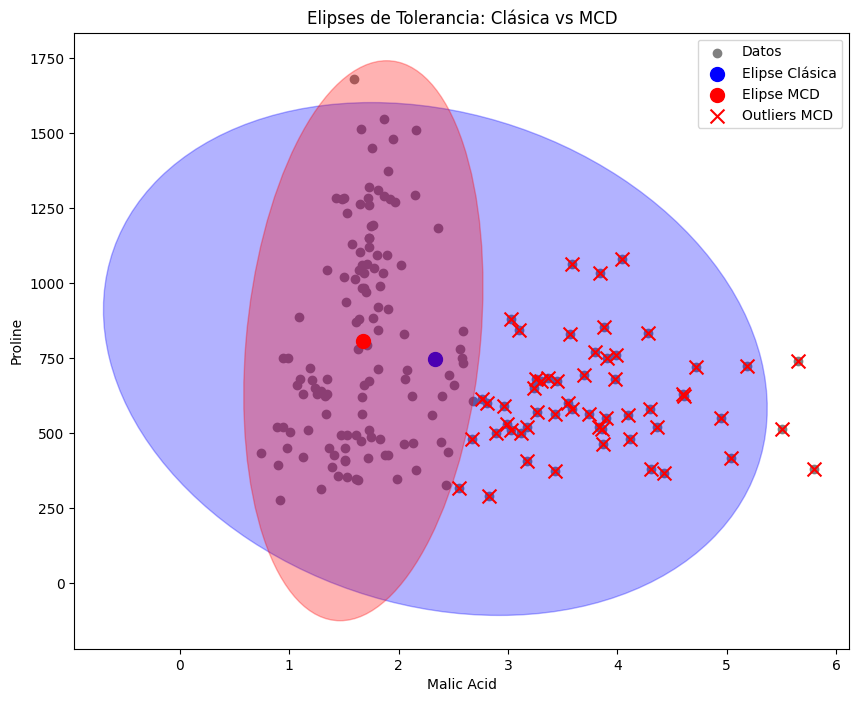

: 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.covariance import MinCovDet
from scipy.stats import chi2
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# 1) Importar los datos
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)

# 2) Seleccionar las columnas: 'malic_acid' y 'proline'
X = df[['malic_acid', 'proline']].values
n, p = X.shape  # n = número de muestras, p = 2 (variables)

# 3) Realizar el análisis según la distancia de Mahalanobis normal y con MCD
# --- Estimación Clásica ---
mean_classic = np.mean(X, axis=0)
cov_classic = np.cov(X, rowvar=False)
inv_cov_classic = np.linalg.inv(cov_classic)
dist_mahalanobis = np.array([np.sqrt(np.dot(np.dot((x - mean_classic), inv_cov_classic), (x - mean_classic))) for x in X])

# --- Estimación MCD ---
mcd = MinCovDet()
mcd.fit(X)
mean_mcd = mcd.location_
cov_mcd = mcd.covariance_
inv_cov_mcd = np.linalg.inv(cov_mcd)
dist_mcd = np.array([np.sqrt(np.dot(np.dot((x - mean_mcd), inv_cov_mcd), (x - mean_mcd))) for x in X])

# Umbral chi-cuadrado (97.5%, 2 grados de libertad)
threshold = np.sqrt(chi2.ppf(0.975, df=p))

# Identificar outliers con MCD
outliers_mcd = dist_mcd > threshold
outliers_mcd_idx = np.where(outliers_mcd)[0]

print("Outliers detectados por MCD:", outliers_mcd_idx)
print("Número de outliers:", len(outliers_mcd_idx))

# 4) Graficar los resultados
# Función para graficar elipses
def plot_ellipse(mean, cov, ax, color='blue', label='Elipse'):
    eigenvalues, eigenvectors = np.linalg.eigh(cov)
    order = eigenvalues.argsort()[::-1]
    eigenvalues, eigenvectors = eigenvalues[order], eigenvectors[:, order]
    vx, vy = eigenvectors[:, 0][0], eigenvectors[:, 0][1]
    theta = np.arctan2(vy, vx)
    width, height = 2 * np.sqrt(eigenvalues * chi2.ppf(0.975, df=2))
    ell = Ellipse(xy=mean, width=width, height=height, angle=np.degrees(theta), color=color, alpha=0.3)
    ax.add_patch(ell)
    ax.scatter(mean[0], mean[1], c=color, s=100, label=label)

# Crear la gráfica
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(X[:, 0], X[:, 1], c='gray', label='Datos')
plot_ellipse(mean_classic, cov_classic, ax, color='blue', label='Elipse Clásica')
plot_ellipse(mean_mcd, cov_mcd, ax, color='red', label='Elipse MCD')
ax.scatter(X[outliers_mcd_idx, 0], X[outliers_mcd_idx, 1], c='red', marker='x', s=100, label='Outliers MCD')
ax.set_xlabel('Malic Acid')
ax.set_ylabel('Proline')
ax.set_title('Elipses de Tolerancia: Clásica vs MCD')
ax.legend()
plt.show()

In [31]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
# from matplotlib.patches import Ellipse # No usado
import matplotlib.colors as mcolors # Podría ser útil para colores personalizados
# from scipy.spatial.distance import cdist # No usado directamente
# from scipy import stats # No usado directamente
# import matplotlib.cm as cm # No usado directamente
import warnings
# from itertools import combinations # No usado directamente
from matplotlib.lines import Line2D # Importado por si se usa en futuras expansiones de plot

# Ignorar advertencias específicas
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning, message="The figure layout has changed to tight") # Ignorar advertencia común de tight_layout

class StatisticalDepthFunctions:
    """
    Implementación manual de funciones de profundidad estadística basadas en:
    - Zuo, Y., & Serfling, R. (2000). General Notions of Statistical Depth Function.
    - Serfling, R. (2006). Depth functions in nonparametric multivariate inference.

    Incluye: Mahalanobis, Spatial (implementación mejorada), Halfspace (proyección).
    """

    def __init__(self, data):
        """
        Inicializa la clase con los datos de entrada.

        Parameters:
        -----------
        data : array-like
            Datos de entrada con forma (n, p) donde n es el número de observaciones
            y p el número de variables. Se convertirán a numpy.ndarray.
        """
        self.data = np.asarray(data) # Asegurar que es un array de numpy
        if self.data.ndim != 2:
             raise ValueError("Los datos de entrada deben ser un array 2D (n_observaciones, n_variables)")
        self.n, self.p = self.data.shape
        if self.n == 0:
            raise ValueError("Los datos de entrada no pueden estar vacíos.")

        # --- Cálculos básicos ---
        self.mean = np.mean(self.data, axis=0)
        self.data_center = self.mean # Centro para Spatial Depth (igual a la media)

        if self.n > 0:
            self.data_scale = np.std(self.data, axis=0) # Escala para Spatial Depth
            self.data_scale[self.data_scale == 0] = 1.0 # Evitar división por cero
        else:
            self.data_scale = np.ones(self.p) # Default si no hay datos

        # --- Cálculos para Mahalanobis ---
        if self.n > 1:
             self.cov = np.cov(self.data, rowvar=False, ddof=1)
             self.cov = np.atleast_2d(self.cov)
        else:
             self.cov = np.zeros((self.p, self.p))

        self.inv_cov = None
        if self.n > self.p:
             try:
                 epsilon = 1e-8
                 regularized_cov = self.cov + epsilon * np.eye(self.p)
                 self.inv_cov = np.linalg.inv(regularized_cov)
             except np.linalg.LinAlgError:
                 print("Advertencia: La matriz de covarianza es singular o mal condicionada. Usando pseudo-inversa.")
                 try:
                      self.inv_cov = np.linalg.pinv(self.cov)
                 except np.linalg.LinAlgError:
                      print("Error: No se pudo calcular la inversa ni la pseudo-inversa de la matriz de covarianza.")
                      self.inv_cov = None
        else:
             print(f"Advertencia: Número de observaciones ({self.n}) no es mayor que el número de dimensiones ({self.p}). "
                   "La matriz de covarianza puede ser singular. La profundidad de Mahalanobis podría no ser fiable.")
             if self.n > 1:
                 try:
                      self.inv_cov = np.linalg.pinv(self.cov)
                 except np.linalg.LinAlgError:
                      print("Error: No se pudo calcular la pseudo-inversa de la matriz de covarianza.")
                      self.inv_cov = None
             else:
                 self.inv_cov = None

        self.feature_names = [f'Variable {i+1}' for i in range(self.p)] # Nombres por defecto


    def mahalanobis_depth(self, x):
        """
        Calcula la profundidad de Mahalanobis (relacionada con L2) para el punto x.
        """
        if self.inv_cov is None:
            print("Advertencia: Inversa de la covarianza no disponible. Devolviendo NaN para Mahalanobis Depth.")
            if np.asarray(x).ndim == 1:
                 return np.nan
            else:
                 return np.full(len(x), np.nan)

        x = np.atleast_2d(x)
        if x.shape[1] != self.p:
             raise ValueError(f"La dimensión de los puntos x ({x.shape[1]}) no coincide con la dimensión de los datos ({self.p})")

        mahalanobis_sq_distances = np.zeros(len(x))
        for i in range(len(x)):
            diff = x[i] - self.mean # Usa la media calculada en init
            mahalanobis_sq_distances[i] = diff @ self.inv_cov @ diff

        depths = 1 / (1 + np.maximum(0, mahalanobis_sq_distances))

        if np.asarray(x).ndim == 1 and len(depths) == 1:
            return depths[0]
        elif x.shape[0] == 1:
             return depths[0]
        return depths

    # --- NUEVA IMPLEMENTACIÓN DE SPATIAL DEPTH ---
    def spatial_depth(self, x):
        """
        Calcula la profundidad espacial según la fórmula:

        SD(x; P) = 1 - ||E[(X_i - x)/||X_i - x||]||

        Utiliza normalización interna (con data_center y data_scale)
        antes del cálculo para robustez.
        (Implementación adaptada de SpatialDepthAnalyzer)
        """
        x = np.atleast_2d(x)
        if x.shape[1] != self.p:
            raise ValueError(f"La dimensión de los puntos x ({x.shape[1]}) no coincide con la dimensión de los datos ({self.p})")

        depths = np.zeros(len(x))

        if self.n == 0:
            return np.zeros(len(x)) # O np.full(len(x), np.nan)

        # Normalizar los datos originales una sola vez (usando atributos de init)
        data_norm = (self.data - self.data_center) / self.data_scale

        for i in range(len(x)):
            point = x[i]
            # Normalizar el punto de consulta (usando atributos de init)
            point_norm = (point - self.data_center) / self.data_scale

            # Calcular las diferencias (X_i_norm - point_norm)
            diff = data_norm - point_norm

            # Calcular las normas de los vectores diferencia
            norms = np.linalg.norm(diff, axis=1)

            # Evitar división por cero para puntos coincidentes
            epsilon = 1e-10
            valid_indices = norms > epsilon
            if not np.all(valid_indices):
                 # Si el punto 'point' es idéntico a algún punto en 'self.data'
                 # Calculamos la profundidad usando solo los puntos diferentes.
                 if np.sum(valid_indices) == 0: # Si point es idéntico a todos los puntos (improbable)
                      mean_unit_vector = np.zeros(self.p) # Profundidad máxima teórica
                 else:
                      unit_vectors = diff[valid_indices] / norms[valid_indices, np.newaxis]
                      mean_unit_vector = np.mean(unit_vectors, axis=0)
            else:
                 # Calcular los vectores unitarios (spatial signs)
                 unit_vectors = diff / norms[:, np.newaxis]
                 # Calcular la media de los vectores unitarios
                 mean_unit_vector = np.mean(unit_vectors, axis=0)

            # La profundidad espacial es 1 menos la norma de la media de los vectores unitarios
            depths[i] = 1 - np.linalg.norm(mean_unit_vector)

        # Asegurar que las profundidades estén entre 0 y 1
        depths = np.clip(depths, 0.0, 1.0)

        if len(x) == 1:
            return depths[0]
        return depths
    # --- FIN NUEVA IMPLEMENTACIÓN DE SPATIAL DEPTH ---

    def halfspace_depth_projection(self, x, n_projections=200, random_state=None):
        """
        Calcula la profundidad de Half Space (Tukey) usando la aproximación por proyección.
        """
        x = np.atleast_2d(x)
        if x.shape[1] != self.p:
             raise ValueError(f"La dimensión de los puntos x ({x.shape[1]}) no coincide con la dimensión de los datos ({self.p})")

        depths = np.zeros(len(x))

        if self.n == 0:
             return np.zeros(len(x))

        if isinstance(random_state, (int, np.integer)):
            rng = np.random.default_rng(random_state)
        elif isinstance(random_state, (np.random.RandomState, np.random.Generator)):
            rng = random_state
        else:
             rng = np.random.default_rng()

        # Generar direcciones unitarias aleatorias en la esfera p-dimensional
        directions = rng.standard_normal((n_projections, self.p))
        norms = np.linalg.norm(directions, axis=1, keepdims=True)
        valid_dirs_mask = norms.flatten() > 1e-10
        directions = directions[valid_dirs_mask]
        norms = norms[valid_dirs_mask]

        if len(directions) == 0:
             print("Advertencia: No se generaron direcciones de proyección válidas.")
             return np.zeros(len(x))

        directions = directions / norms # Normalizar a vectores unitarios
        actual_projections = len(directions)
        if actual_projections < n_projections:
             print(f"Advertencia: Solo se usarán {actual_projections} direcciones de proyección válidas de las {n_projections} solicitadas.")

        # Proyectar los datos originales sobre las direcciones
        projections_data_all = self.data @ directions.T # Shape (n, actual_projections)

        # Calcular la profundidad para cada punto x
        for i in range(len(x)):
            point_x = x[i]
            projections_x = point_x @ directions.T # Proyectar el punto x (Shape (actual_projections,))

            # Calcular la proporción de puntos de datos a cada "lado" del punto proyectado
            prop_le = np.mean(projections_data_all <= projections_x, axis=0) # Proporción menor o igual
            prop_ge = np.mean(projections_data_all >= projections_x, axis=0) # Proporción mayor o igual

            # La profundidad en una dirección es min(prop_le, prop_ge)
            # La profundidad total es el mínimo sobre todas las direcciones
            depths[i] = np.min(np.minimum(prop_le, prop_ge))

        if np.asarray(x).ndim == 1 and len(depths) == 1:
             return depths[0]
        elif x.shape[0] == 1:
             return depths[0]
        return depths


    def detect_outliers(self, depths, percentile=5):
        """
        Detecta outliers basados en valores de profundidad.
        Maneja NaNs en las profundidades calculadas.
        """
        if not (0 <= percentile <= 100):
            raise ValueError("El percentil debe estar entre 0 y 100.")
        depths = np.asarray(depths).flatten()
        valid_depths = depths[~np.isnan(depths)] # Considerar solo profundidades válidas

        if len(valid_depths) == 0:
             print("Advertencia: No hay profundidades válidas para calcular el umbral.")
             threshold = np.nan
             # Devuelve False para todo si no hay profundidades válidas
             return np.zeros_like(depths, dtype=bool), threshold

        threshold = np.percentile(valid_depths, percentile)
        # Considerar un punto como outlier si su profundidad es menor que el umbral O si es NaN
        is_outlier = (depths < threshold) | np.isnan(depths)

        return is_outlier, threshold

    def compute_all_depths(self, points=None):
        """
        Calcula todas las profundidades implementadas para los puntos dados.
        Si points es None, usa self.data.
        """
        target_points = self.data if points is None else np.asarray(points)
        if target_points.ndim == 1:
            target_points = target_points.reshape(1, -1)
        elif target_points.ndim != 2:
             raise ValueError("Los puntos deben ser None, un array 1D o un array 2D.")
        if target_points.shape[1] != self.p:
             raise ValueError(f"La dimensión de los puntos ({target_points.shape[1]}) no coincide con la dimensión de los datos ({self.p})")


        depths = {
            'Mahalanobis': self.mahalanobis_depth(target_points),
            'Spatial': self.spatial_depth(target_points),
            'HalfSpace-Projection': self.halfspace_depth_projection(target_points)
            # Añadir más métodos aquí si se implementan
        }

        # Si se pasó un solo punto como 1D array, devolver escalares en lugar de arrays de un elemento
        if points is not None and np.asarray(points).ndim == 1:
             for key in depths:
                 if isinstance(depths[key], np.ndarray) and depths[key].size == 1:
                     depths[key] = depths[key].item() # Convertir array de 1 elemento a escalar
        return depths

    def compute_all_outliers(self, percentile=5):
        """
        Detecta outliers usando todos los métodos de profundidad para self.data.
        """
        depths = self.compute_all_depths(points=self.data) # Calcula profundidades para los datos originales
        outliers = {}
        thresholds = {}

        for method, depth_values in depths.items():
            # Asegurarse de que depth_values sea un array numpy para detect_outliers
            outliers[method], thresholds[method] = self.detect_outliers(np.asarray(depth_values), percentile)

        return outliers, depths, thresholds

    # --- Métodos de Ploteo y Resumen (Sin cambios significativos, usarán la nueva spatial_depth) ---

    def plot_outliers_and_contours(self, method, percentile=5, x_index=0, y_index=1, n_grid=50):
        """
        Grafica los datos y los contornos de profundidad para UN método específico.
        Destaca los outliers y el contorno umbral.
        (Nota: Usa la implementación de ploteo original de StatisticalDepthFunctions)
        """
        if self.p < 2:
            raise ValueError("La visualización requiere al menos 2 dimensiones.")
        if not (0 <= x_index < self.p and 0 <= y_index < self.p and x_index != y_index):
            raise ValueError(f"Índices de variables ({x_index}, {y_index}) inválidos para p={self.p}.")
        if method not in ['Mahalanobis', 'Spatial', 'HalfSpace-Projection']:
            raise ValueError(f"Método '{method}' no reconocido.")

        # --- Calcular profundidades y outliers para el método especificado ---
        # Usar compute_all_depths para obtener los valores para el método específico
        all_depths_data = self.compute_all_depths(points=self.data)
        depths_data = all_depths_data.get(method)

        if depths_data is None: # Manejar caso donde el método no devolvió nada
             print(f"Advertencia: No se encontraron profundidades para el método {method}.")
             depths_data = np.full(self.n, np.nan) # Asignar NaN si no hay datos

        depths_data = np.asarray(depths_data).flatten() # Asegurar que es un array 1D

        is_outlier, threshold = self.detect_outliers(depths_data, percentile)
        n_outliers = np.sum(is_outlier) # Contar outliers (incluyendo NaNs si detect_outliers los marca)

        # --- Preparar datos para gráficos ---
        data_2d = self.data[:, [x_index, y_index]]
        feature_names = self.feature_names

        # Configurar figura y ejes
        fig, axes = plt.subplots(1, 2, figsize=(17, 7), sharex=False, sharey=False) # figsize ajustado, sharex/y=False
        fig.suptitle(f'Análisis de Profundidad y Atípicos - Método: {method} (Percentil {percentile}%)', fontsize=16)
        ax1, ax2 = axes

        # --- Subgráfico Izquierdo: Datos y Atípicos ---
        ax1.set_title(f'Datos y Atípicos Detectados ({n_outliers} atípicos)')
        ax1.set_xlabel(feature_names[x_index], fontsize=12)
        ax1.set_ylabel(feature_names[y_index], fontsize=12)

        # Graficar puntos normales (aquellos que no son outliers)
        ax1.scatter(data_2d[~is_outlier, 0], data_2d[~is_outlier, 1],
                    c='tab:blue', alpha=0.6, label=f'Normal (n={self.n - n_outliers})')

        # Graficar puntos atípicos (aquellos marcados como outliers)
        if n_outliers > 0:
            label_outlier = f'Atípico (n={n_outliers})'
            if not np.isnan(threshold): # Añadir umbral a la etiqueta si es válido
                label_outlier += f' (D < {threshold:.3f})'
            ax1.scatter(data_2d[is_outlier, 0], data_2d[is_outlier, 1],
                        c='tab:red', marker='X', s=100, label=label_outlier, edgecolors='k', linewidth=0.5)

        ax1.legend(loc='best')
        ax1.grid(True, linestyle='--', alpha=0.5)

        # --- Subgráfico Derecho: Contornos de Profundidad ---
        ax2.set_title('Contornos de Profundidad')
        ax2.set_xlabel(feature_names[x_index], fontsize=12)
        ax2.set_ylabel(feature_names[y_index], fontsize=12) # Añadir etiqueta Y a ax2 también

        # Ajustar n_grid y margin_factor (podemos personalizarlo si queremos)
        contour_n_grid = 100 if method == 'Spatial' else n_grid # Usar grid más fino para Spatial
        margin_factor = 1.5 # Factor para definir límites de la cuadrícula

        # Crear cuadrícula basada en los datos 2D
        std_devs = np.std(data_2d, axis=0)
        # Asegurar que std_devs no sea cero para evitar márgenes nulos
        std_devs = np.where(std_devs < 1e-6, 1.0, std_devs)
        x_min_data, x_max_data = np.min(data_2d[:, 0]), np.max(data_2d[:, 0])
        y_min_data, y_max_data = np.min(data_2d[:, 1]), np.max(data_2d[:, 1])

        x_margin = margin_factor * std_devs[0]
        y_margin = margin_factor * std_devs[1]

        x_min_grid = x_min_data - x_margin
        x_max_grid = x_max_data + x_margin
        y_min_grid = y_min_data - y_margin
        y_max_grid = y_max_data + y_margin

        x_grid = np.linspace(x_min_grid, x_max_grid, contour_n_grid)
        y_grid = np.linspace(y_min_grid, y_max_grid, contour_n_grid)
        xx, yy = np.meshgrid(x_grid, y_grid)

        # Crear puntos de la cuadrícula en la dimensionalidad original (p)
        # Usar la media para las dimensiones no graficadas
        grid_points_pdim = np.tile(self.mean, (contour_n_grid * contour_n_grid, 1))
        grid_points_pdim[:, x_index] = xx.flatten()
        grid_points_pdim[:, y_index] = yy.flatten()

        # Calcular profundidades para la cuadrícula usando el método seleccionado
        # Reutilizar compute_all_depths para consistencia
        depths_grid_dict = self.compute_all_depths(points=grid_points_pdim)
        depths_grid = depths_grid_dict.get(method)

        if depths_grid is None:
            print(f"Error: No se pudieron obtener profundidades de la cuadrícula para {method}.")
            depths_grid = np.full(xx.shape, np.nan)
        else:
            depths_grid = np.asarray(depths_grid).reshape(xx.shape)

        # Manejar NaNs en la cuadrícula antes de graficar contornos
        valid_mask_grid = ~np.isnan(depths_grid)
        if not np.any(valid_mask_grid):
            print(f"Advertencia: No se pudieron calcular profundidades válidas en la cuadrícula para {method}. Omitiendo contornos.")
            ax2.text(0.5, 0.5, 'Contornos no disponibles', horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes)
        else:
            # Encontrar min/max válidos para los niveles
            min_depth_grid = np.nanmin(depths_grid)
            max_depth_grid = np.nanmax(depths_grid)

            if min_depth_grid == max_depth_grid:
                print(f"Advertencia: Profundidad constante ({min_depth_grid:.3f}) en la cuadrícula para {method}. Los contornos pueden no ser informativos.")
                levels = np.array([min_depth_grid]) # Solo un nivel
            else:
                levels = np.linspace(min_depth_grid, max_depth_grid, 15) # Número de niveles para relleno

            contour_levels = np.linspace(min_depth_grid, max_depth_grid, 8) # Número de niveles para líneas

            # Graficar contornos rellenos (contourf)
            contourf = ax2.contourf(xx, yy, depths_grid, cmap='viridis', alpha=0.75, levels=levels, extend='both')

            # Graficar líneas de contorno (contour)
            contour_lines = ax2.contour(xx, yy, depths_grid, colors='white', linewidths=0.6, levels=contour_levels)
            ax2.clabel(contour_lines, inline=True, fontsize=8, fmt='%.2f')


            # Resaltar el contorno umbral si es válido y está dentro del rango de la cuadrícula
            threshold_label_contour = None
            if not np.isnan(threshold) and (min_depth_grid <= threshold <= max_depth_grid):
                threshold_label_contour = f'Umbral ({threshold:.3f})'
                ax2.contour(xx, yy, depths_grid, levels=[threshold], colors='red', linewidths=2.0)
            elif not np.isnan(threshold):
                # Imprimir advertencia si el umbral está fuera de rango
                # print(f"Advertencia: Umbral {threshold:.3f} fuera de rango de contorno [{min_depth_grid:.3f}, {max_depth_grid:.3f}]")
                threshold_label_contour = f'Umbral ({threshold:.3f}) (Fuera de rango)'

            # Añadir colorbar
            cbar = fig.colorbar(contourf, ax=ax2)
            cbar.set_label('Profundidad', fontsize=12)

            # Graficar los datos originales encima de los contornos
            # Usar colores/marcadores consistentes con ax1 para claridad
            ax2.scatter(data_2d[~is_outlier, 0], data_2d[~is_outlier, 1],
                        c='black', s=20, alpha=0.6, label='Normal (Datos)')
            if n_outliers > 0:
                ax2.scatter(data_2d[is_outlier, 0], data_2d[is_outlier, 1],
                            c='black', marker='x', s=50, alpha=0.8, label='Atípico (Datos)')


            # Crear leyenda para el contorno umbral y los datos
            handles = []
            labels = []
            # Añadir handle para datos normales si existen
            if np.sum(~is_outlier) > 0:
                 handles.append(Line2D([0], [0], color='k', marker='o', markersize=5, linestyle='', label='Normal (Datos)'))
                 labels.append('Normal (Datos)')
            # Añadir handle para datos atípicos si existen
            if n_outliers > 0:
                 handles.append(Line2D([0], [0], color='k', marker='x', markersize=7, linestyle='', label='Atípico (Datos)'))
                 labels.append('Atípico (Datos)')

            if threshold_label_contour:
                handles.append(Line2D([0], [0], color='red', lw=2.0, label=threshold_label_contour))
                labels.append(threshold_label_contour)
            ax2.legend(handles=handles, loc='best')

        ax2.grid(True, linestyle='--', alpha=0.5)
        # Establecer límites de los ejes para ax2 basados en la cuadrícula
        ax2.set_xlim(x_min_grid, x_max_grid)
        ax2.set_ylim(y_min_grid, y_max_grid)

        # Sincronizar límites si se desea (opcional, puede hacer zoom excesivo)
        # ax1.set_xlim(ax2.get_xlim())
        # ax1.set_ylim(ax2.get_ylim())

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        return fig, axes


    def summarize_outliers(self, percentile=5):
        """
        Genera un resumen de los outliers detectados por cada método.
        """
        outliers, _, thresholds = self.compute_all_outliers(percentile)
        methods = list(outliers.keys())
        if not methods:
             print("Advertencia: No hay resultados de outliers para resumir.")
             return pd.DataFrame(), None

        summary_data = []
        for method in methods:
            count = np.sum(outliers[method])
            threshold = thresholds[method]
            summary_data.append({
                'Método': method,
                'Umbral': f"{threshold:.4f}" if not np.isnan(threshold) else "N/A",
                'Cantidad de Outliers': count,
                'Proporción de Outliers': f"{(count / self.n) * 100:.2f}%" if self.n > 0 else "N/A"
            })
        outliers_summary = pd.DataFrame(summary_data).set_index('Método')

        methods_overlap_data = []
        if len(methods) > 1:
            # Comparaciones por pares
            from itertools import combinations
            for method1, method2 in combinations(methods, 2):
                pair_name = f"{method1} & {method2}"
                mask1 = np.asarray(outliers[method1]).astype(bool)
                mask2 = np.asarray(outliers[method2]).astype(bool)
                if len(mask1) == self.n and len(mask2) == self.n:
                     coincidence = np.sum(mask1 & mask2)
                     methods_overlap_data.append({
                         'Combinación': pair_name,
                         'Coincidencias': coincidence,
                         'Proporción Coincidencia': f"{(coincidence / self.n) * 100:.2f}%" if self.n > 0 else "N/A"
                     })

            # Coincidencia de todos los métodos
            if len(methods) > 2:
                all_outliers_mask = np.ones(self.n, dtype=bool)
                valid_combination = True
                for method in methods:
                    mask = np.asarray(outliers[method]).astype(bool)
                    if len(mask) == self.n:
                        all_outliers_mask &= mask
                    else: # Si algún método falló (e.g., Mahalanobis sin inv_cov), no calcular coincidencia total
                        valid_combination = False
                        break
                if valid_combination:
                    coincidence_all = np.sum(all_outliers_mask)
                    methods_overlap_data.append({
                        'Combinación': 'Todos los métodos',
                        'Coincidencias': coincidence_all,
                        'Proporción Coincidencia': f"{(coincidence_all / self.n) * 100:.2f}%" if self.n > 0 else "N/A"
                    })

            if methods_overlap_data:
                methods_overlap = pd.DataFrame(methods_overlap_data)
            else:
                methods_overlap = None # Si solo hay 1 método o falló el cálculo
        else:
            methods_overlap = None # Si solo hay 1 método

        return outliers_summary, methods_overlap

    def plot_methods_comparison(self, percentile=5, x_index=0, y_index=1):
        """
        Genera una gráfica comparativa de los tres métodos de profundidad estadística.
        Muestra los outliers detectados por cada método en gráficos separados y uno superpuesto.

        Parameters:
        -----------
        percentile : float, default=5
            Percentil para determinar el umbral de outliers.
        x_index, y_index : int, default=0, 1
            Índices de las variables a graficar en los ejes x e y.

        Returns:
        --------
        matplotlib.figure.Figure
            La figura que contiene los gráficos comparativos.
        """
        if self.p < 2:
            raise ValueError("La visualización requiere al menos 2 dimensiones.")
        if not (0 <= x_index < self.p and 0 <= y_index < self.p and x_index != y_index):
            raise ValueError(f"Índices de variables ({x_index}, {y_index}) inválidos para p={self.p}.")

        # Calcular outliers para todos los métodos
        outliers, depths, thresholds = self.compute_all_outliers(percentile)
        methods = ['Mahalanobis', 'Spatial', 'HalfSpace-Projection'] # Orden fijo

        # Preparar datos para gráficos
        data_2d = self.data[:, [x_index, y_index]]
        feature_names = self.feature_names

        # Configurar figura y ejes (2x2 grid)
        fig, axes = plt.subplots(2, 2, figsize=(16, 14)) # Tamaño ajustado
        fig.suptitle(f'Comparación de Outliers por Métodos de Profundidad (Percentil {percentile}%)', fontsize=18)

        # Aplanar el array de ejes para facilitar su manejo
        axes = axes.flatten()

        # Determinar límites comunes para todos los gráficos basados en datos 2D
        std_devs = np.std(data_2d, axis=0)
        std_devs = np.where(std_devs < 1e-6, 1.0, std_devs) # Evitar std dev cero
        margin_factor = 1.5 # Factor de margen común
        x_min_common = np.min(data_2d[:, 0]) - margin_factor * std_devs[0]
        x_max_common = np.max(data_2d[:, 0]) + margin_factor * std_devs[0]
        y_min_common = np.min(data_2d[:, 1]) - margin_factor * std_devs[1]
        y_max_common = np.max(data_2d[:, 1]) + margin_factor * std_devs[1]

        # Colores y marcadores para la gráfica de resumen
        plot_colors = {'Mahalanobis': 'tab:red', 'Spatial': 'tab:green', 'HalfSpace-Projection': 'tab:purple'}
        plot_markers = {'Mahalanobis': 'X', 'Spatial': 'o', 'HalfSpace-Projection': '*'}
        plot_sizes = {'Mahalanobis': 100, 'Spatial': 70, 'HalfSpace-Projection': 120}

        # Crear un gráfico para cada método (los 3 primeros ejes)
        for i, method in enumerate(methods):
            if i >= 3: break # Solo usar los 3 primeros ejes para métodos individuales
            ax = axes[i]
            is_outlier = outliers.get(method, np.zeros(self.n, dtype=bool)) # Obtener máscara de outliers
            n_outliers = np.sum(is_outlier)
            threshold = thresholds.get(method, np.nan) # Obtener umbral

            # Título del subgráfico
            ax.set_title(f'Método: {method} ({n_outliers} atípicos)', fontsize=14)
            ax.set_xlabel(feature_names[x_index], fontsize=12)
            ax.set_ylabel(feature_names[y_index], fontsize=12)

            # Graficar puntos normales
            ax.scatter(data_2d[~is_outlier, 0], data_2d[~is_outlier, 1],
                    c='tab:blue', alpha=0.5, s=30, label=f'Normal')

            # Graficar puntos atípicos
            if n_outliers > 0:
                label_outlier = f'Atípico'
                if not np.isnan(threshold):
                    label_outlier += f' (D<{threshold:.3f})'
                # Usar color y marcador específico del método para consistencia visual
                ax.scatter(data_2d[is_outlier, 0], data_2d[is_outlier, 1],
                        c=plot_colors[method], marker=plot_markers[method], s=plot_sizes[method]*0.8,
                        label=label_outlier, edgecolors='k', linewidth=0.5, alpha=0.8)

            ax.legend(loc='best', fontsize=10)
            ax.grid(True, linestyle='--', alpha=0.5)
            # Aplicar límites comunes
            ax.set_xlim(x_min_common, x_max_common)
            ax.set_ylim(y_min_common, y_max_common)

        # Crear un gráfico resumen con todos los métodos superpuestos (cuarto eje)
        ax_summary = axes[3]
        ax_summary.set_title('Superposición de Outliers Detectados', fontsize=14)
        ax_summary.set_xlabel(feature_names[x_index], fontsize=12)
        ax_summary.set_ylabel(feature_names[y_index], fontsize=12)

        # Graficar todos los puntos como fondo gris claro
        ax_summary.scatter(data_2d[:, 0], data_2d[:, 1],
                        c='lightgray', alpha=0.4, s=20, label='Todos los puntos')

        # Graficar los outliers de cada método encima, con su color/marcador
        handles_summary = [Line2D([0], [0], color='lightgray', marker='o', markersize=5, linestyle='', label='Todos')]
        for method in methods:
            is_outlier = outliers.get(method, np.zeros(self.n, dtype=bool))
            n_outliers = np.sum(is_outlier)
            if n_outliers > 0:
                ax_summary.scatter(data_2d[is_outlier, 0], data_2d[is_outlier, 1],
                                c=plot_colors[method], marker=plot_markers[method], s=plot_sizes[method],
                                label=f'{method} ({n_outliers})',
                                edgecolors='k', linewidth=0.5, alpha=0.7)
                # Crear handle para la leyenda manualmente
                handles_summary.append(Line2D([0], [0], color=plot_colors[method], marker=plot_markers[method],
                                              markersize=8, linestyle='', label=f'{method} ({n_outliers})'))


        ax_summary.legend(handles=handles_summary, loc='best', fontsize=10)
        ax_summary.grid(True, linestyle='--', alpha=0.5)
        # Aplicar límites comunes al gráfico de resumen
        ax_summary.set_xlim(x_min_common, x_max_common)
        ax_summary.set_ylim(y_min_common, y_max_common)

        # Ajustar diseño general
        plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajustar para el supertítulo
        return fig


# --- Ejemplo de Uso (igual que el original, ahora usa la nueva spatial_depth) ---
def demo_wine_dataset():
    wine = load_wine()
    data = wine.data
    df = pd.DataFrame(data, columns=wine.feature_names)

    # --- Selección de Características ---
    # Cambiar aquí si se desean otras variables
    selected_features = ['malic_acid', 'proline']
    try:
        X = df[selected_features].values
        feature_names = selected_features
    except KeyError:
        print(f"Error: Las características {selected_features} no se encontraron. Usando las dos primeras.")
        X = data[:, :2]
        feature_names = wine.feature_names[:2]


    print(f"Usando {X.shape[0]} observaciones y {X.shape[1]} variables: {', '.join(feature_names)}")
    if X.shape[0] <= X.shape[1]:
         print("\n*** ADVERTENCIA: El número de observaciones no es mayor que el número de dimensiones. ***\n"
               "*** Los resultados de Mahalanobis y Halfspace pueden no ser fiables. ***\n")

    # Crear instancia del analizador
    depth_analyzer = StatisticalDepthFunctions(X)
    depth_analyzer.feature_names = feature_names # Asignar nombres correctos

    # 1. Calcular profundidades (solo si se necesitan explícitamente)
    # print("\nCalculando profundidades para los datos originales...")
    # depths = depth_analyzer.compute_all_depths()
    # df_depths = pd.DataFrame(depths, index=df.index)
    # print(df_depths.describe())


    # 2. Detectar y resumir outliers
    print("\nDetectando y resumiendo outliers (percentil 5%)...")
    try:
        outlier_summary, overlap_summary = depth_analyzer.summarize_outliers(percentile=5)
        print("\n--- Resumen de Outliers por Método ---")
        print(outlier_summary)
        if overlap_summary is not None and not overlap_summary.empty:
            print("\n--- Coincidencia de Outliers entre Métodos ---")
            print(overlap_summary.to_string()) # Imprimir todo el dataframe

    except Exception as e:
        print(f"Error al resumir outliers: {e}")
        import traceback
        traceback.print_exc()


    # 3. Graficar Atípicos y Contornos por Método Individualmente
    print("\nGenerando gráficos de análisis por método...")
    methods_to_plot = ['Mahalanobis', 'Spatial', 'HalfSpace-Projection']
    for method in methods_to_plot:
        print(f"  Generando gráfico para {method}...")
        try:
            # Usar índices 0 y 1 porque seleccionamos 2 variables para X
            fig, axes = depth_analyzer.plot_outliers_and_contours(
                method=method,
                percentile=5,
                x_index=0, # Índice de la primera variable seleccionada en X
                y_index=1, # Índice de la segunda variable seleccionada en X
                n_grid=50 # n_grid base, se ajustará internamente si es necesario
            )
            if fig is not None:
                 filename = f"wine_analysis_{method}_p5_merged.png"
                 fig.savefig(filename, dpi=120) # Guardar gráfico
                 print(f"    Gráfico guardado como '{filename}'")
                 plt.close(fig) # Cerrar figura para no mostrarla inmediatamente
            else:
                 print(f"    No se generó gráfico para {method}.")
        except Exception as e:
            print(f"    Error al graficar para {method}: {e}")
            import traceback
            traceback.print_exc()


    # 4. Generar gráfico comparativo de los métodos
    print("\nGenerando gráfico comparativo de métodos...")
    try:
        fig_comparison = depth_analyzer.plot_methods_comparison(
            percentile=5,
            x_index=0, # Índice de la primera variable seleccionada
            y_index=1  # Índice de la segunda variable seleccionada
        )
        if fig_comparison is not None:
            comparison_filename = "wine_analysis_methods_comparison_merged.png"
            fig_comparison.savefig(comparison_filename, dpi=120)
            print(f"  Gráfico comparativo guardado como '{comparison_filename}'")
            plt.close(fig_comparison) # Cerrar figura
        else:
            print("  No se pudo generar el gráfico comparativo.")
    except Exception as e:
        print(f"  Error al generar el gráfico comparativo: {e}")
        import traceback
        traceback.print_exc()

    print("\nAnálisis completado. Los gráficos se han guardado en archivos PNG.")
    # Descomentar la siguiente línea si se desea mostrar los gráficos interactivamente al final
    # plt.show()


if __name__ == "__main__":
    demo_wine_dataset()

Usando 178 observaciones y 2 variables: malic_acid, proline

Detectando y resumiendo outliers (percentil 5%)...

--- Resumen de Outliers por Método ---
                      Umbral  Cantidad de Outliers Proporción de Outliers
Método                                                                   
Mahalanobis           0.1522                     9                  5.06%
Spatial               0.0996                     9                  5.06%
HalfSpace-Projection  0.0112                     6                  3.37%

--- Coincidencia de Outliers entre Métodos ---
                          Combinación  Coincidencias Proporción Coincidencia
0               Mahalanobis & Spatial              9                   5.06%
1  Mahalanobis & HalfSpace-Projection              3                   1.69%
2      Spatial & HalfSpace-Projection              3                   1.69%
3                   Todos los métodos              3                   1.69%

Generando gráficos de análisis por método...